In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
import seaborn as sns


In [2]:
aapl = r'C:\Users\muham\OneDrive\Projects\Sentiment analysis on stock\Sentiment_Analysis\UpdateAAPL__2024-06-29_data.csv'
msft = r'C:\Users\muham\OneDrive\Projects\Sentiment analysis on stock\Sentiment_Analysis\UpdateMSFT__2024-06-30_data.csv'

df = pd.read_csv(aapl)
dfm = pd.read_csv(msft)

In [3]:
def plot_correlation_heatmap(df, columns):
   
    # Calculate correlation matrix
    correlation_matrix = df[columns].corr()

    # Print correlation matrix
    print('Correlation Matrix:')
    print(correlation_matrix)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0)
    plt.title('Correlation Matrix')
    plt.show()

### AAPL Corrleation Matrix

Correlation Matrix:
             Positive  Negative   Nuetral  Stock Price
Positive     1.000000 -0.262607 -0.361497     0.270084
Negative    -0.262607  1.000000 -0.304782    -0.113518
Nuetral     -0.361497 -0.304782  1.000000    -0.012388
Stock Price  0.270084 -0.113518 -0.012388     1.000000


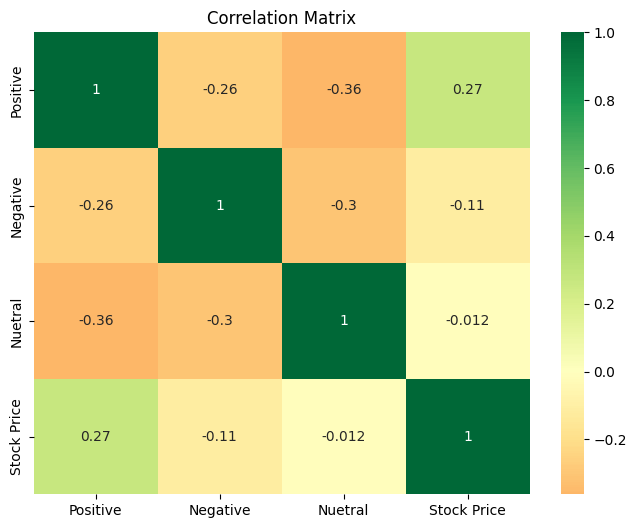

In [4]:
columns_to_analyze = ['Positive', 'Negative', 'Nuetral', 'Stock Price']
plot_correlation_heatmap(df, columns_to_analyze)

### MSFT Corrleation Analaysis

Correlation Matrix:
             Positive  Negative   Nuetral  Stock Price
Positive     1.000000 -0.101398 -0.827848    -0.010028
Negative    -0.101398  1.000000 -0.474117    -0.227502
Nuetral     -0.827848 -0.474117  1.000000     0.136872
Stock Price -0.010028 -0.227502  0.136872     1.000000


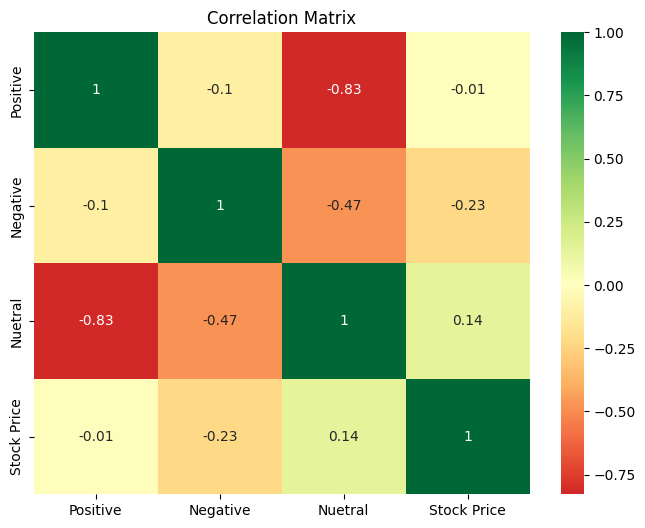

In [5]:
columns_to_analyze = ['Positive', 'Negative', 'Nuetral', 'Stock Price']
plot_correlation_heatmap(dfm, columns_to_analyze)

#### Linear regression functions

In [6]:
def train_linear_regression(X, y, test_size=0.2, random_state=42):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize LinearRegression model
    linear_regressor = LinearRegression()

    # Train the model
    linear_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = linear_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Stock Prices')
    plt.show()

    return linear_regressor, mse, r2

#### Random Forest

In [7]:
def train_random_forest_regression(X, y, test_size=0.2, random_state=42, n_estimators=100):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize RandomForestRegressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

    # Train the model
    rf_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Stock Prices (Random Forest Regressor)')
    plt.show()

    return rf_regressor, mse, r2

### Gradient Boosting

In [8]:
def train_gradient_boosting_regression(X, y, test_size=0.2, random_state=42, n_estimators=100, learning_rate=0.1):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize GradientBoostingRegressor
    gb_regressor = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random_state)

    # Train the model
    gb_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = gb_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Stock Prices (Gradient Boosting Regressor)')
    plt.show()

    return gb_regressor, mse, r2


### SVR Regression

In [9]:
def train_svr_regression(X, y, test_size=0.2, random_state=42, kernel='rbf', C=1.0, epsilon=0.1):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize SVR
    svr_regressor = SVR(kernel=kernel, C=C, epsilon=epsilon)

    # Train the model
    svr_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svr_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plot actual vs. predicted using a scatter plot with a regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Stock Prices (Support Vector Regression)')
    plt.show()

    # Plot the density plot of actual vs. predicted values
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_test, label='Actual', fill=True, alpha=0.5)
    sns.kdeplot(y_pred, label='Predicted', fill=True, alpha=0.5)
    plt.xlabel('Stock Prices')
    plt.ylabel('Density')
    plt.title('Density Plot of Actual vs. Predicted Stock Prices (Support Vector Regression)')
    plt.legend()
    plt.show()

    return svr_regressor, mse, r2

### Nueral Network

In [10]:
def train_neural_network_regression(X, y, test_size=0.2, random_state=42, hidden_layer_sizes=(100,), max_iter=200):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize MLPRegressor
    nn_regressor = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter, random_state=random_state)

    # Train the model
    nn_regressor.fit(X_train, y_train)

    # Predict on the test set
    y_pred = nn_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Plot actual vs. predicted using a scatter plot with a regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Stock Prices (Neural Network Regressor)')
    plt.show()

    # Plot the histogram of prediction errors (residuals)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, bins=30)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Prediction Errors (Neural Network Regressor)')
    plt.show()

    return nn_regressor, mse, r2

### AAPL Predictive model

In [11]:
# Feature engineering
df['Positive_Negative_Ratio'] = df['Positive'] / (df['Negative'] + 1)  # Adding 1 to avoid division by zero
df['Positive_Nuetral_Ratio'] = df['Positive'] / (df['Nuetral'] + 1)
df['Negative_Nuetral_Ratio'] = df['Negative'] / (df['Nuetral'] + 1)
df['Sentiment_Sum'] = df['Positive'] + df['Negative'] + df['Nuetral']

# Rolling averages
df['Positive_7D_Rolling'] = df['Positive'].rolling(window=7).mean()
df['Negative_7D_Rolling'] = df['Negative'].rolling(window=7).mean()
df['Nuetral_7D_Rolling'] = df['Nuetral'].rolling(window=7).mean()

# Lag features
df['Positive_Lag_1'] = df['Positive'].shift(1)
df['Negative_Lag_1'] = df['Negative'].shift(1)
df['Nuetral_Lag_1'] = df['Nuetral'].shift(1)

# Exponential moving averages
df['Positive_7D_EMA'] = df['Positive'].ewm(span=7, adjust=False).mean()
df['Negative_7D_EMA'] = df['Negative'].ewm(span=7, adjust=False).mean()
df['Nuetral_7D_EMA'] = df['Nuetral'].ewm(span=7, adjust=False).mean()

# Volatility
df['Positive_Volatility'] = df['Positive'].rolling(window=7).std()
df['Negative_Volatility'] = df['Negative'].rolling(window=7).std()
df['Nuetral_Volatility'] = df['Nuetral'].rolling(window=7).std()

# Interaction features
df['Positive_Negative_Interaction'] = df['Positive'] * df['Negative']
df['Positive_Nuetral_Interaction'] = df['Positive'] * df['Nuetral']



In [12]:
features = [
    'Positive', 'Negative', 'Nuetral', 'Positive_Negative_Ratio', 
    'Positive_Nuetral_Ratio', 'Negative_Nuetral_Ratio', 'Sentiment_Sum', 
    'Positive_7D_Rolling', 'Negative_7D_Rolling', 'Nuetral_7D_Rolling', 
    'Positive_Lag_1', 'Negative_Lag_1', 'Nuetral_Lag_1', 'Positive_7D_EMA', 
    'Negative_7D_EMA', 'Nuetral_7D_EMA', 'Positive_Volatility', 
    'Negative_Volatility', 'Nuetral_Volatility', 'Positive_Negative_Interaction', 
    'Positive_Nuetral_Interaction'
]

Mean Squared Error: 263.0864055084842
R-squared: 0.35686167910497524


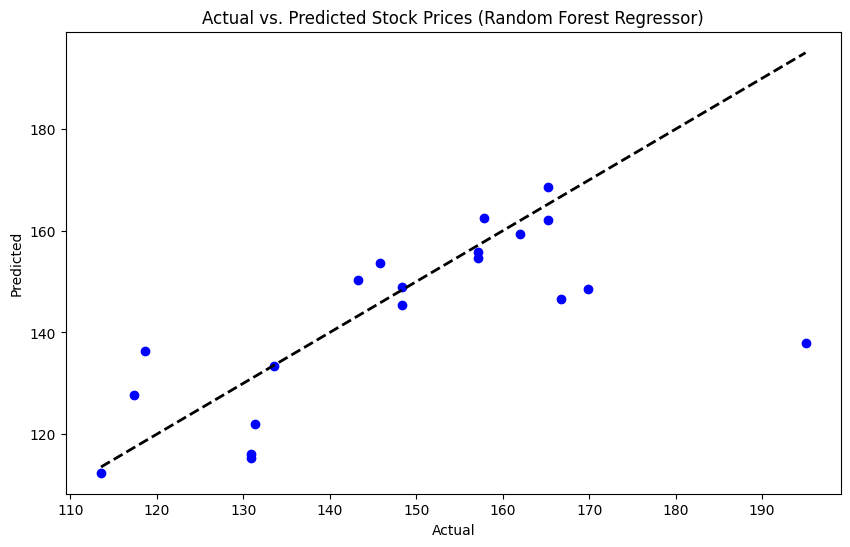

(RandomForestRegressor(random_state=42),
 263.0864055084842,
 0.35686167910497524)

In [19]:
# Handling missing values if any
df.fillna(0, inplace=True)

# Features and target variable
X = df[features]
y = df['Stock Price']

train_random_forest_regression(X,y)

### MSFT Predictive model

In [16]:
# Feature engineering
dfm['Positive_Negative_Ratio'] = dfm['Positive'] / (dfm['Negative'] + 1)  # Adding 1 to avoid division by zero
dfm['Positive_Nuetral_Ratio'] = dfm['Positive'] / (dfm['Nuetral'] + 1)
dfm['Negative_Nuetral_Ratio'] = dfm['Negative'] / (dfm['Nuetral'] + 1)
dfm['Sentiment_Sum'] = dfm['Positive'] + dfm['Negative'] + dfm['Nuetral']

# Rolling averages
dfm['Positive_7D_Rolling'] = dfm['Positive'].rolling(window=7).mean()
dfm['Negative_7D_Rolling'] = dfm['Negative'].rolling(window=7).mean()
dfm['Nuetral_7D_Rolling'] = dfm['Nuetral'].rolling(window=7).mean()

# Lag features
dfm['Positive_Lag_1'] = dfm['Positive'].shift(1)
dfm['Negative_Lag_1'] = dfm['Negative'].shift(1)
dfm['Nuetral_Lag_1'] = dfm['Nuetral'].shift(1)

# Exponential moving averages
dfm['Positive_7D_EMA'] = dfm['Positive'].ewm(span=7, adjust=False).mean()
dfm['Negative_7D_EMA'] = dfm['Negative'].ewm(span=7, adjust=False).mean()
dfm['Nuetral_7D_EMA'] = dfm['Nuetral'].ewm(span=7, adjust=False).mean()

# Volatility
dfm['Positive_Volatility'] = dfm['Positive'].rolling(window=7).std()
dfm['Negative_Volatility'] = dfm['Negative'].rolling(window=7).std()
dfm['Nuetral_Volatility'] = dfm['Nuetral'].rolling(window=7).std()

# Interaction features
dfm['Positive_Negative_Interaction'] = dfm['Positive'] * dfm['Negative']
dfm['Positive_Nuetral_Interaction'] = dfm['Positive'] * dfm['Nuetral']


In [21]:
feature = [
    'Positive', 'Negative', 'Nuetral', 'Positive_Negative_Ratio', 
    'Positive_Nuetral_Ratio', 'Negative_Nuetral_Ratio', 'Sentiment_Sum', 
    'Positive_7D_Rolling', 'Negative_7D_Rolling', 'Nuetral_7D_Rolling', 
    'Positive_Lag_1', 'Negative_Lag_1', 'Nuetral_Lag_1', 'Positive_7D_EMA', 
    'Negative_7D_EMA', 'Nuetral_7D_EMA', 'Positive_Volatility', 
    'Negative_Volatility', 'Nuetral_Volatility', 'Positive_Negative_Interaction', 
    'Positive_Nuetral_Interaction'
]

Mean Squared Error: 1068.0166285781495
R-squared: 0.47293354104793395


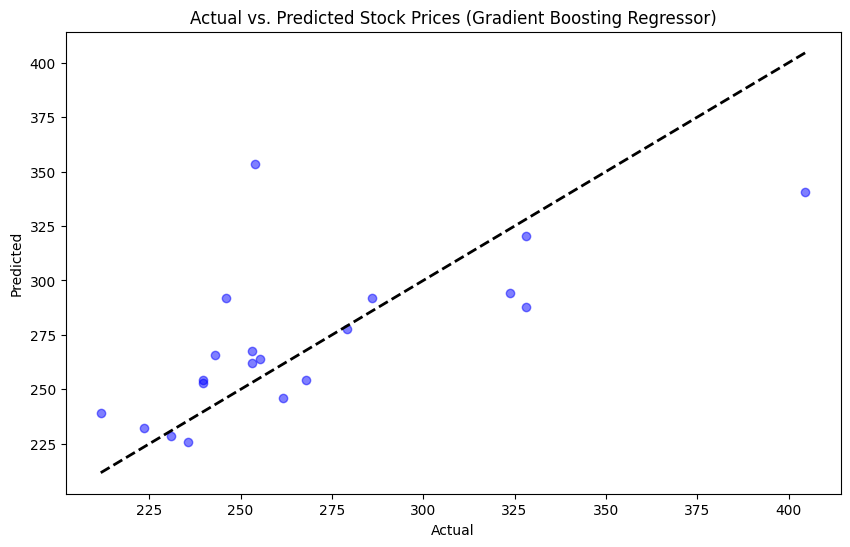

(GradientBoostingRegressor(random_state=42),
 1068.0166285781495,
 0.47293354104793395)

In [22]:
# Handling missing values if any
dfm.fillna(0, inplace=True)

# Features and target variable
X = dfm[feature]
y = dfm['Stock Price']

train_gradient_boosting_regression(X,y)